In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt      # For base plotting

import seaborn as sns                # Easier plotting

import os

data = pd.read_csv("../input/superstore_dataset2011-2015.csv",encoding = 'unicode_escape')
#removing the inbetween spaces of columns.
data.rename(columns=lambda x: x.replace(' ',''),inplace=True)
data.shape
# Any results you write to the current directory are saved as output.

['superstore_dataset2011-2015.csv']


(51290, 24)

In [2]:
#creating a new column for daynames
data['DayName']=pd.to_datetime(data['OrderDate']).dt.day_name()

#converting object to datetime columns
data['OrderDate']=pd.to_datetime(data['OrderDate'],dayfirst=True)
data['ShipDate']=pd.to_datetime(data['ShipDate'],dayfirst=True)

#creating a new column to know the shipment time in days
data['shipmentTime']=(data['ShipDate']-data['OrderDate']).dt.days
data[['DayName','shipmentTime']].head(10)

,DayName,shipmentTime
0,Saturday,5
1,Saturday,7
2,Saturday,4
3,Saturday,4
4,Saturday,7
5,Saturday,7
6,Sunday,2
7,Sunday,2
8,Sunday,3
9,Sunday,2


In [3]:
#what are the busiest days in a week?specific to any year of a country,region,Market....
dataInd13=data.loc[(data['OrderDate'].dt.year==2013) & (data['Country']=='India')]
dataAus13=data.loc[(data['OrderDate'].dt.year==2013) & (data['Country']=='Australia')]
dataChina13=data.loc[(data['OrderDate'].dt.year==2013) & (data['Country']=='China')]

dataAus13.groupby('DayName').size().reset_index(name='count').sort_values('count',ascending=False)
dataChina13.groupby('DayName').size().reset_index(name='count').sort_values('count',ascending=False)
dataInd13.groupby('DayName').size().reset_index(name='count').sort_values('count',ascending=False)


,DayName,count
0,Friday,81
5,Tuesday,71
1,Monday,66
2,Saturday,54
6,Wednesday,51
4,Thursday,44
3,Sunday,28


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

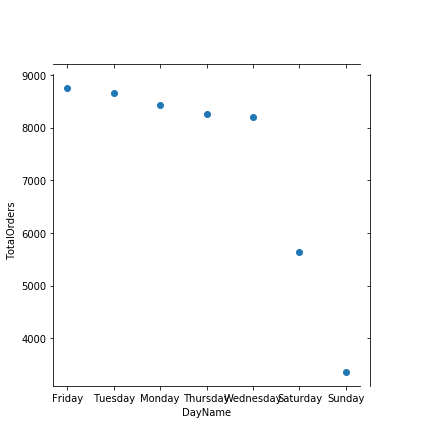

In [4]:
#total orders distribution with respect to the days.
totaldf=data.groupby('DayName').size().reset_index(name='count').sort_values('count', ascending=False).rename(columns={'count':'TotalOrders'})
sns.jointplot("DayName",
              "TotalOrders",
              totaldf,
              kind='scatter'  # kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
              )

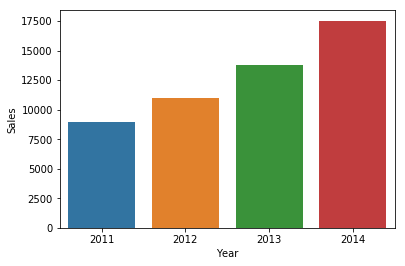

In [5]:
#distribution of global sales across the years
Globalsales=data.groupby(data['OrderDate'].dt.year).size().reset_index(name='count').sort_values('count', ascending=False).rename(columns={'OrderDate':'Year','count':'Sales'})
Globalsales
sns.barplot(x = "Year",     
            y= "Sales",    
            data=Globalsales
            )

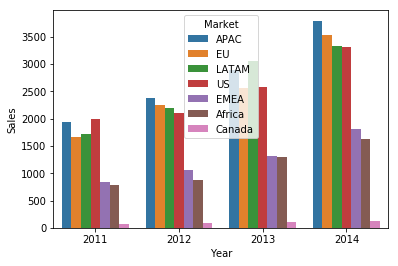

In [6]:
#distribution of sales in market and  across the years
Marketsales=data.groupby([data['OrderDate'].dt.year,'Market']).size().reset_index(name='count').sort_values('count', ascending=False).rename(columns={'OrderDate':'Year','count':'Sales'})
Marketsales
sns.barplot(x = "Year",  
            y= "Sales", 
            hue="Market",
            data=Marketsales
            )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


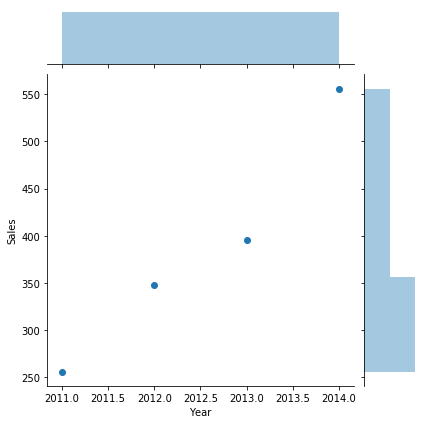

In [7]:
#distribution of sales in India across the years
dataInd=data.loc[(data['Country']=='India')].groupby(data['OrderDate'].dt.year).size().reset_index(name='count').sort_values('count', ascending=False).rename(columns={'OrderDate':'Year','count':'Sales'})

sns.jointplot("Year",
              "Sales",
              dataInd,
              kind='scatter'  # kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
              )

In [8]:
#To know more about the shipment time like 'min','max','mean' based on low,medium and high priority orders for different countries.
IndMean=dataInd13.groupby('OrderPriority').agg({'shipmentTime':['min','max','count','mean']}).rename(columns={'mean': 'IndShipTime'}).reset_index()
AusMean=dataAus13.groupby('OrderPriority').agg({'shipmentTime':['min','max','count','mean']}).rename(columns={'mean': 'AusShipTime'}).reset_index()
IndMean

OrderPriority shipmentTime                      
                         min max count IndShipTime
0      Critical            0   3    27    1.740741
1          High            0   5   102    2.882353
2           Low            6   7     8    6.750000
3        Medium            0   7   258    4.651163

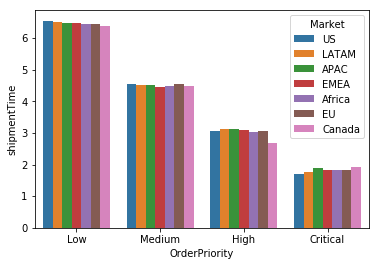

In [9]:
#distribution of average shipping time across the global markets
avgShipping=data[['Market','OrderPriority','shipmentTime']].groupby(['OrderPriority','Market']).mean().reset_index().sort_values('shipmentTime', ascending=False)

sns.barplot(x = "OrderPriority",     # Data is groupedby this variable
            y= "shipmentTime",    # Aggregated by this variable
                               # Continuous variable. Bar-ht,
                               
            hue= "Market",     # Distribution is gender-wise
            data=avgShipping
            )

In [10]:
#number of orders placed for different discount ranges based on category
data.loc[data['Discount']>=0.40].groupby('Category').size().reset_index(name='count').sort_values('count', ascending=False)

lessDiscountdf=data.loc[data['Discount']<0.40].groupby('Category').size().reset_index(name='count').sort_values('count', ascending=False)
lessDiscountdf

,Category,count
1,Office Supplies,24990
2,Technology,8248
0,Furniture,7914


In [11]:
#find out the avg shipping cost distribution for top 20 different countries
data.groupby('Country').agg({'ShippingCost':'mean'}).sort_values('ShippingCost', ascending=False).head(20)


,ShippingCost
Country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


In [12]:
#Who are the top-20 most profitable customers.
data20=data.sort_values('Profit',ascending=False).head(20)[['CustomerID','CustomerName']]
data20

,CustomerID,CustomerName
8898,TC-20980,Tamara Chand
38848,RB-19360,Raymond Buch
29946,HL-15040,Hunter Lopez
30124,AB-10105,Adrian Barton
37929,SC-20095,Sanjit Chand
17421,PJ-18835,Patrick Jones
38234,TA-21385,Tom Ashbrook
25346,CM-12385,Christopher Martinez
2756,CA-11965,Carol Adams
12813,CA-12775,Cynthia Arntzen


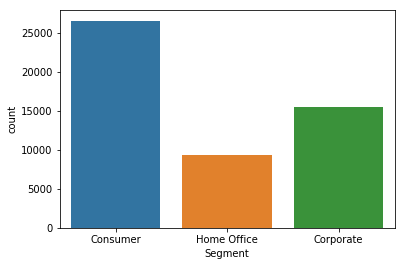

In [13]:
 #What is the distribution of our customer segment
sns.countplot("Segment", data = data)

In [14]:
# Which customers have visited this store just once
df1 = data.groupby('CustomerID').apply(lambda x: pd.Series(dict(onevisit=x.shape[0]))).reset_index()
df1.loc[df1.onevisit == 1, ['CustomerID', 'onevisit']] 

,CustomerID,onevisit
170,BG-1035,1
431,DK-2985,1
1001,ME-8010,1
1013,MG-7650,1
1017,MG-7890,1
1260,RC-9825,1
1586,ZC-11910,1


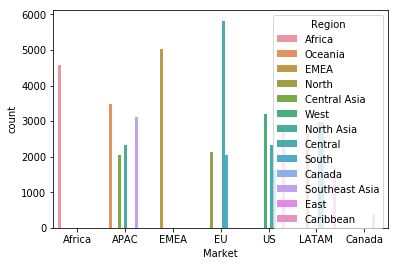

In [15]:
#6 What is the distribution of orders for Market and region wise?
sns.countplot('Market',hue='Region',data= data)